In [ ]:
import splitfolders

splitfolders.ratio(input='Alzheimer_s Dataset', output='output', seed=2002, ratio=(0.8, 0.2))


In [1]:
from PIL import Image 
import numpy as np
np.set_printoptions(threshold=np.inf)
img = Image.open("Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")
img.show()
img_np = np.array(img)
print(img_np.min(), img_np.max(), img_np.shape)

0 247 (208, 176)


0 247 (208, 176)


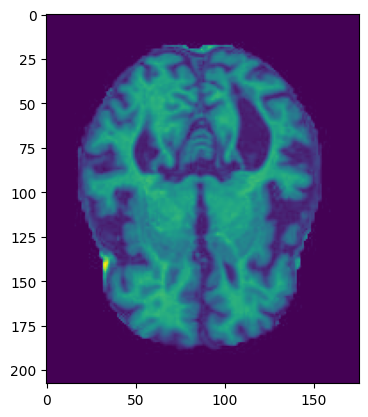

In [2]:
import matplotlib.pyplot as plt

image = plt.imread("Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")

plt.imshow(image)
image_np = np.array(image)
print(image_np.min(), image_np.max(), image_np.shape)

torch.Size([16, 1, 180, 150])
tensor(0.2582) tensor(0.0817)


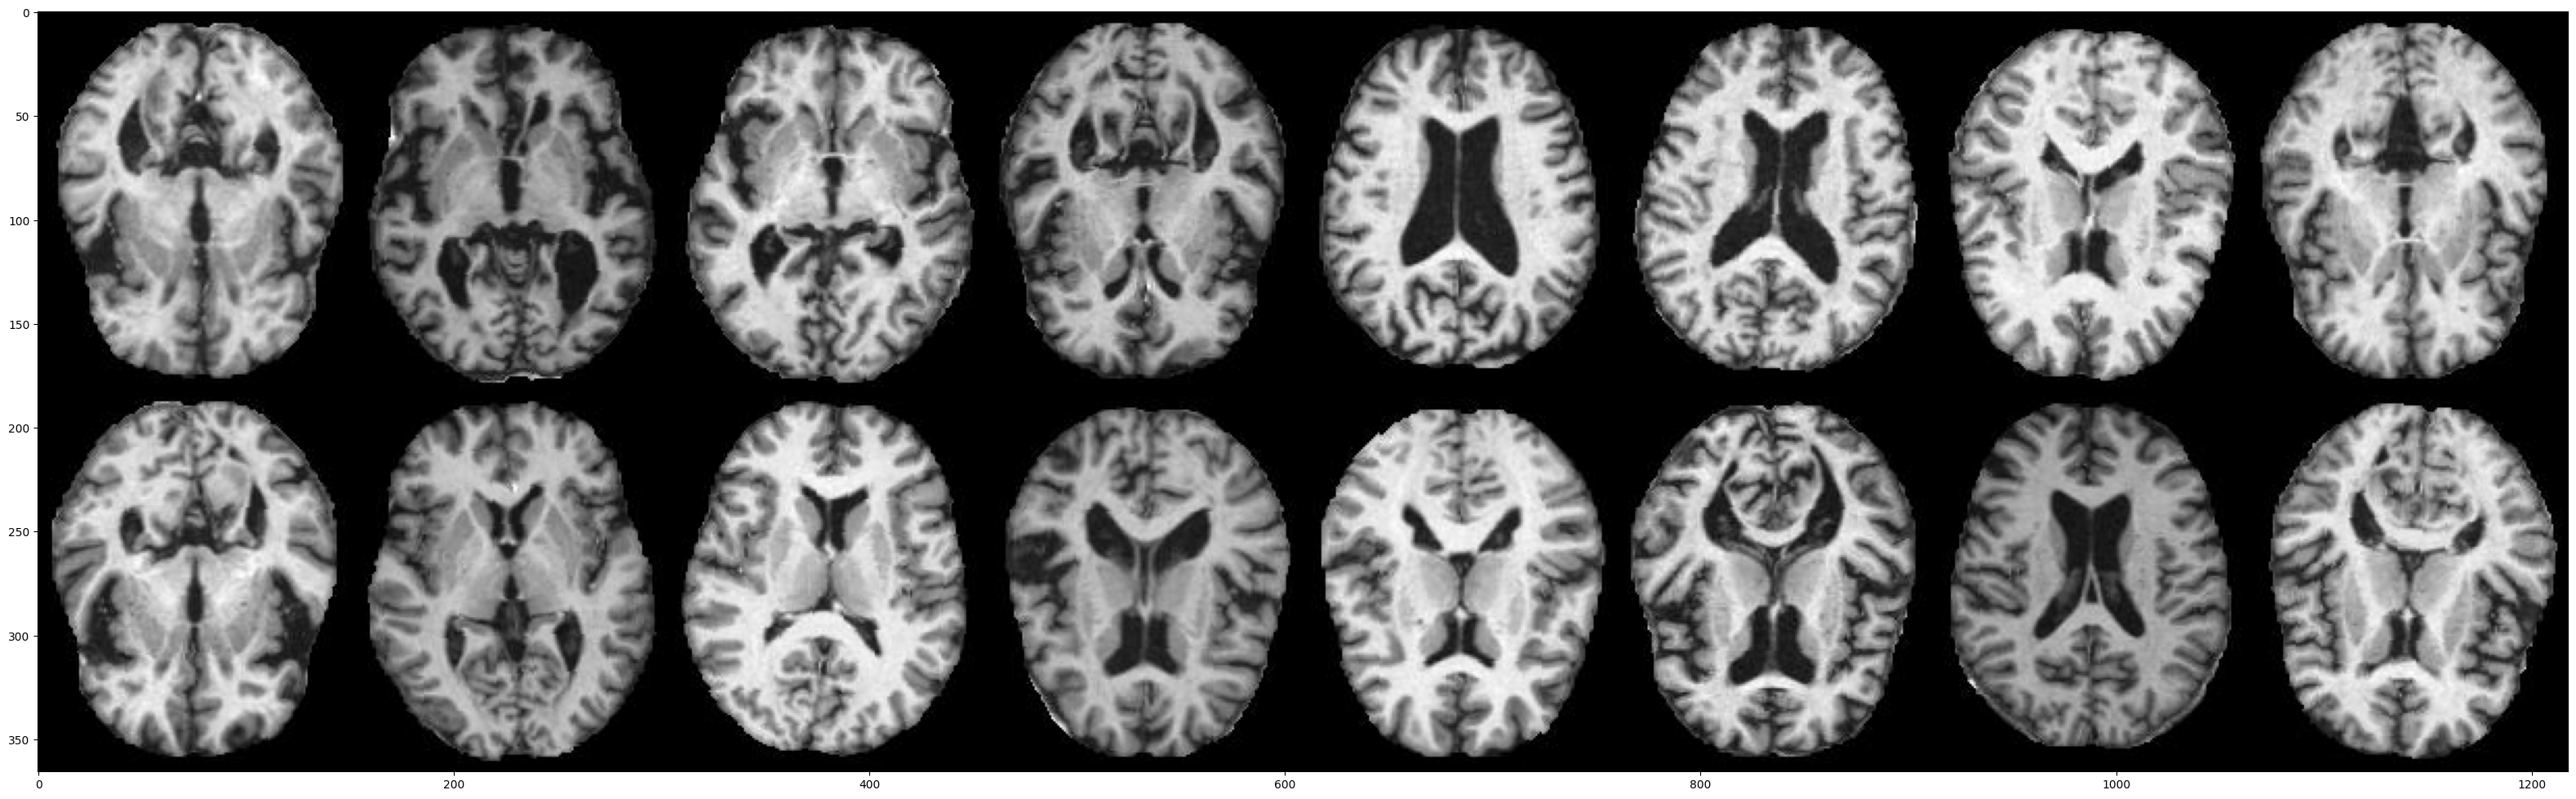

In [9]:
from PIL import Image 
import os
import random
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


class MyDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        
        self.class2id = {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
        self.data = self.get_img(data_dir)
        self.transform = transform
 
    def __getitem__(self, index):
        path, label = self.data[index]
        img = Image.open(path)
 
        if self.transform is not None:
            img = self.transform(img)
 
        return img, self.class2id[label]
 
    def __len__(self):
        return len(self.data)
 
    @staticmethod
    def get_img(data_dir):
        all_path = []
        labels = os.listdir(data_dir)
        for label in labels:    
            filepath = data_dir + label
            filename  = os.listdir(filepath)
            for fname in filename:
                ffpath = filepath + "/" + fname
                path = [ffpath, label]
                all_path.append(path)
 
        return all_path
    
transform = transforms.Compose([
    transforms.CenterCrop([180, 150]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    
])

dataset = MyDataset("Alzheimer_s Dataset/train/", transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

inputs, classes = next(iter(dataloader))
out = torchvision.utils.make_grid(inputs)
inp = out.numpy().transpose((1, 2, 0))
plt.figure(figsize=(40,40))
plt.imshow(inp)
print(inputs.shape)

mean = 0
std = 0
size = 0
for data, labels in dataloader:
    mean += data[:,0,:,:].sum()
    size += len(data)

mean = mean / size / (200*200)

# mean
#0.2582

for data, labels in dataloader:
    std += ((data[:,0,:,:] - mean)**2).sum()
    
std = std / size / (200*200)
print(mean, std)
# std
# 0.1033

In [57]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

data_transforms = transforms.Compose([
    transforms.CenterCrop(200),
    transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor()
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image_datasets = datasets.ImageFolder("Alzheimer_s Dataset/test", data_transforms)


dataloaders = DataLoader(image_datasets, batch_size=16, shuffle=True, num_workers=4)

# def imshow(inp, title=None):
#     inp = inp.numpy().transpose((1, 2, 0))
#     print(inp.shape)
#     # inp = np.clip(inp, 0, 1)
#     plt.figure(figsize=(40,40))
#     plt.imshow(inp)
#     if title is not None:
#         plt.title(title)
#     # plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders))
print(inputs.shape)
print(image_datasets.class_to_idx)
# print(inputs.mean([0, 2, 3]))
# print((inputs[:,0,:,:] != inputs[:,1,:,:]).sum(), (inputs[:,0,:,:] == inputs[:,1,:,:]).sum())
# print((inputs[:,0,:,:] != inputs[:,2,:,:]).sum(), (inputs[:,0,:,:] == inputs[:,2,:,:]).sum())

# tensor([0.2615, 0.2615, 0.2615])
# tensor(0) tensor(640000)
# tensor(0) tensor(640000)
#发现三个维度一模一样？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？


# Make a grid from batch

# out = torchvision.utils.make_grid(inputs)

# imshow(out)

torch.Size([16, 3, 200, 200])
{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [47]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

data_transforms = transforms.Compose([
    transforms.CenterCrop(200),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor()
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image_datasets = datasets.ImageFolder("Alzheimer_s Dataset/train", data_transforms)

dataloaders = DataLoader(image_datasets, batch_size=256, shuffle=False, num_workers=4)

mean = [0, 0, 0]
std = [0, 0, 0]
size = 0
for data, labels in dataloaders:
    for i in range(3):
        mean[i] += data[:,i,:,:].sum()
    size += len(data)

for i in range(3):
    mean[i] = mean[i] / size / (200*200)
# mean
#0.2582

for data, labels in dataloaders:
    for i in range(3):
        std[i] += ((data[:,i,:,:] - mean[i])**2).sum()

for i in range(3):
    std[i] = std[i] / size / (200*200)
# std
# 0.1033

[tensor(0.1033), tensor(0.1033), tensor(0.1033)]